In [2]:
import pandas as pd
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
# Load bike + weather dataset
df = pd.read_csv("citibike_2022_daily_with_weather.csv")

df.head()

,date,daily_ride_count,PRCP,TAVG,TMAX,TMIN
0,2022-01-01,20428,19.3,11.6,13.9,10.0
1,2022-01-02,43009,1.0,11.4,15.6,3.9
2,2022-01-03,33189,0.0,1.4,3.9,-4.3
3,2022-01-04,36842,0.0,-2.7,2.2,-6.0
4,2022-01-05,34230,6.1,3.2,8.9,0.0


In [4]:
import os
os.listdir("data")

['.DS_Store', '2022-citibike-tripdata', '2022-citibike-tripdata.zip']

In [5]:
import os

trip_path = "data/2022-citibike-tripdata"
files = sorted(os.listdir(trip_path))

files[:20], len(files)

(['202201-citibike-tripdata.zip',
  '202201-citibike-tripdata_1.csv',
  '202201-citibike-tripdata_2.csv',
  '202202-citibike-tripdata.zip',
  '202202-citibike-tripdata_1.csv',
  '202202-citibike-tripdata_2.csv',
  '202203-citibike-tripdata.zip',
  '202203-citibike-tripdata_1.csv',
  '202203-citibike-tripdata_2.csv',
  '202204-citibike-tripdata.zip',
  '202204-citibike-tripdata_1.csv',
  '202204-citibike-tripdata_2.csv',
  '202204-citibike-tripdata_3.csv',
  '202205-citibike-tripdata.zip',
  '202205-citibike-tripdata_1.csv',
  '202205-citibike-tripdata_2.csv',
  '202205-citibike-tripdata_3.csv',
  '202206-citibike-tripdata.zip',
  '202206-citibike-tripdata_1.csv',
  '202206-citibike-tripdata_2.csv'],
 48)

In [6]:
import pandas as pd
import os

trip_path = "data/2022-citibike-tripdata"

# Keep only CSV files (ignore zip)
csv_files = [f for f in os.listdir(trip_path) if f.endswith(".csv")]

dfs = []

for file in csv_files:
    df_temp = pd.read_csv(
        os.path.join(trip_path, file),
        usecols=["start_station_name"]
    )
    dfs.append(df_temp)

stations_full = pd.concat(dfs, ignore_index=True)

stations_full.head()

,start_station_name
0,Flatbush Ave & Ocean Ave
1,Forsyth St\t& Grand St
2,Perry St & Bleecker St
3,FDR Drive & E 35 St
4,E 40 St & 5 Ave


In [7]:
# Count trips per start station
popular_stations = (
    stations_full
    .groupby("start_station_name")
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
)

popular_stations.head(10)

,start_station_name,trip_count
1587,W 21 St & 6 Ave,128436
1718,West St & Chambers St,122491
495,Broadway & W 58 St,113727
286,6 Ave & W 33 St,105757
8,1 Ave & E 68 St,104459
461,Broadway & E 14 St,98276
485,Broadway & W 25 St,97902
1511,University Pl & E 14 St,96527
463,Broadway & E 21 St,94992
1603,W 31 St & 7 Ave,93758


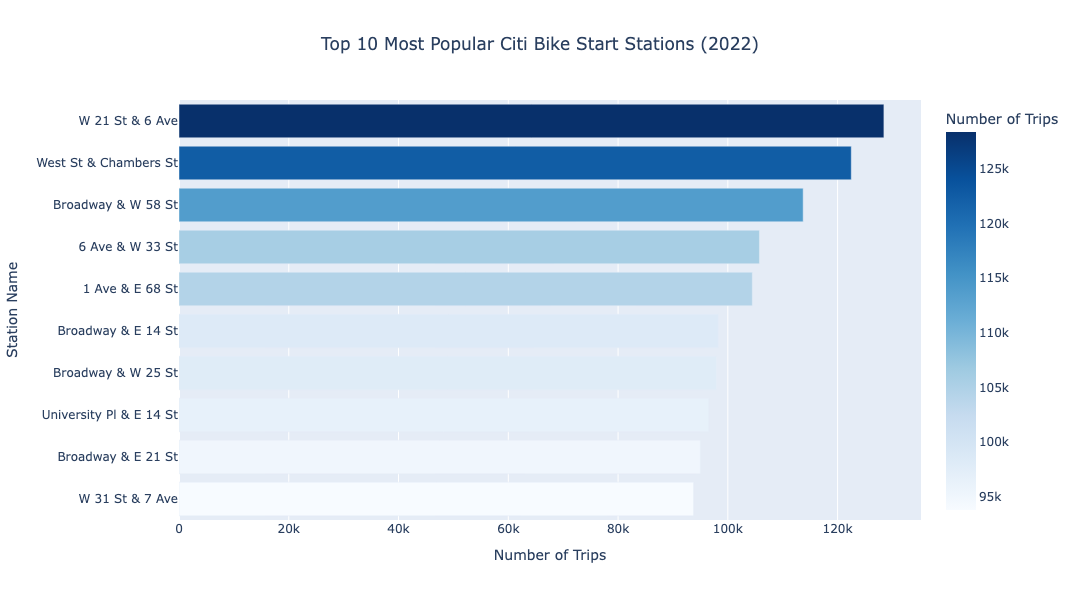

In [8]:
# Take top 10 stations
top10 = popular_stations.head(10)

import plotly.express as px

fig_bar = px.bar(
    top10,
    x="trip_count",
    y="start_station_name",
    orientation="h",
    title="Top 10 Most Popular Citi Bike Start Stations (2022)",
    labels={
        "trip_count": "Number of Trips",
        "start_station_name": "Station Name"
    },
    color="trip_count",
    color_continuous_scale="Blues"
)

fig_bar.update_layout(
    yaxis=dict(categoryorder="total ascending"),
    title_x=0.5,
    height=600
)

fig_bar.show()

In [9]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Sort by date (important for line charts)
df = df.sort_values("date")

df.head()

,date,daily_ride_count,PRCP,TAVG,TMAX,TMIN
0,2022-01-01,20428,19.3,11.6,13.9,10.0
1,2022-01-02,43009,1.0,11.4,15.6,3.9
2,2022-01-03,33189,0.0,1.4,3.9,-4.3
3,2022-01-04,36842,0.0,-2.7,2.2,-6.0
4,2022-01-05,34230,6.1,3.2,8.9,0.0


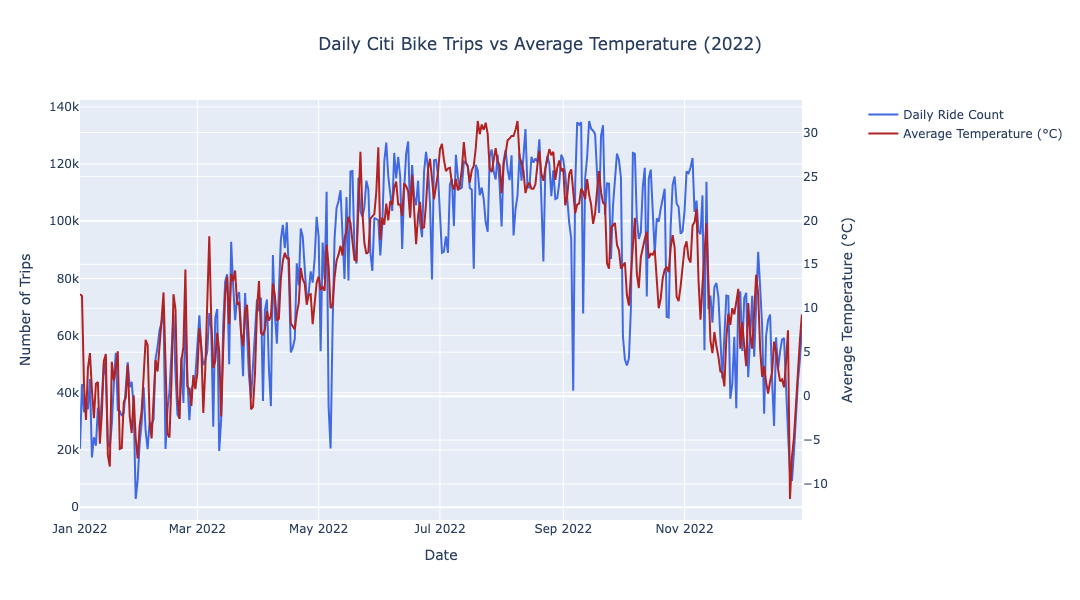

In [12]:
# Create dual-axis line chart
fig_line = make_subplots(specs=[[{"secondary_y": True}]])

# Add daily ride count (primary axis)
fig_line.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["daily_ride_count"],
        name="Daily Ride Count",
        line=dict(color="royalblue", width=2)
    ),
    secondary_y=False
)

# Add average temperature (secondary axis)
fig_line.add_trace(
    go.Scatter(
        x=df["date"],
        y=df["TAVG"],
        name="Average Temperature (°C)",
        line=dict(color="firebrick", width=2)
    ),
    secondary_y=True
)

# Layout customization
fig_line.update_layout(
    title="Daily Citi Bike Trips vs Average Temperature (2022)",
    title_x=0.5,
    xaxis_title="Date",
    height=600
)

fig_line.update_yaxes(title_text="Number of Trips", secondary_y=False)
fig_line.update_yaxes(title_text="Average Temperature (°C)", secondary_y=True)

fig_line.show()

In [8]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract month number
df["month"] = df["date"].dt.month

# Extract month name
df["month_name"] = df["date"].dt.strftime("%b")  # Jan, Feb, Mar...

# Calculate monthly average daily rides
monthly_avg = (
    df.groupby(["month", "month_name"])["daily_ride_count"]
    .mean()
    .reset_index()
    .sort_values("month")
)

monthly_avg.head()

,month,month_name,daily_ride_count
0,1,Jan,33034.032258
1,2,Feb,42762.821429
2,3,Mar,59549.516129
3,4,Apr,75377.966667
4,5,May,92429.064516


In [7]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract month number
df["month"] = df["date"].dt.month

# Extract month name
df["month_name"] = df["date"].dt.strftime("%b")  # Jan, Feb, Mar...

# Calculate monthly average daily rides
monthly_avg = (
    df.groupby(["month", "month_name"])["daily_ride_count"]
    .mean()
    .reset_index()
    .sort_values("month")
)

monthly_avg.head()

,month,month_name,daily_ride_count
0,1,Jan,33034.032258
1,2,Feb,42762.821429
2,3,Mar,59549.516129
3,4,Apr,75377.966667
4,5,May,92429.064516


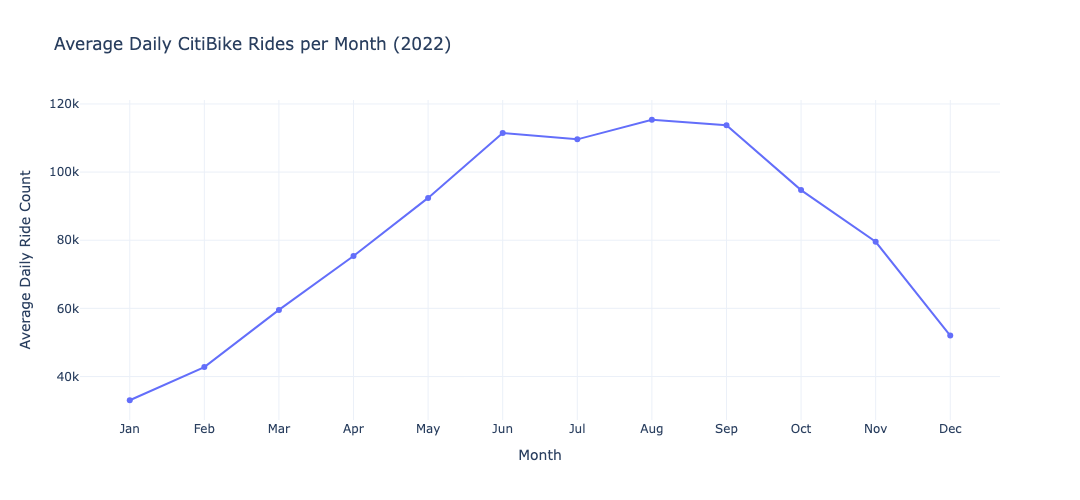

In [10]:
import plotly.express as px

fig_monthly = px.line(
    monthly_avg,
    x="month_name",
    y="daily_ride_count",
    markers=True,
    title="Average Daily CitiBike Rides per Month (2022)",
    labels={
        "month_name": "Month",
        "daily_ride_count": "Average Daily Ride Count"
    }
)

fig_monthly.update_layout(
    template="plotly_white",
    height=500
)

fig_monthly.show()